#요약

**9.1**

- 클러스터링 한다..
- 몇 개의 군집으로 할 건지가 중요하다..
- 이너셔, 실루엣 점수 등 지표를 가지고 결정한다..
- 원형 데이터 셋에 알맞다..
- 핵심이웃을 가지고 클러스터링하는 DBSCAN 방식도 있다

\\
**9.2**

- 가우시안 혼합 모델은 타원형 데이터 셋에 알맞다
- k-평균의 일반화..
    - 평균 : 클러스터 중심
    - 분산 : 타원형으로 퍼진 정도
- 이론적 정보이득(AIC, BIC) 지표로 최적의 클러스터 갯수 선정

- 레이블이 없는 데이터로 훈련하는 학습 방법
- ex) 군집, 이상치 탐지, 밀도 추정
- KMeans에서 교육목적으로 매개변수를 지정..
    - init="random"
    - algorithm="full"

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#9.1 군집

**군집(클러스터링)**

- 비슷한 샘플을 구별해 하나의 **클러스터**혹은 비슷한 샘플의 그룹으로 할당하는 작업

###분류 _vs_ 군집

- 분류 : 지도 학습
- 군집 : 비지도 학습
- 붓꽃 데이터셋으로 비교해보자..

In [2]:
#붓꽃 데이터셋 불러오기

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [3]:
#특성 이름..
print(data.feature_names)

#타깃 이름..
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


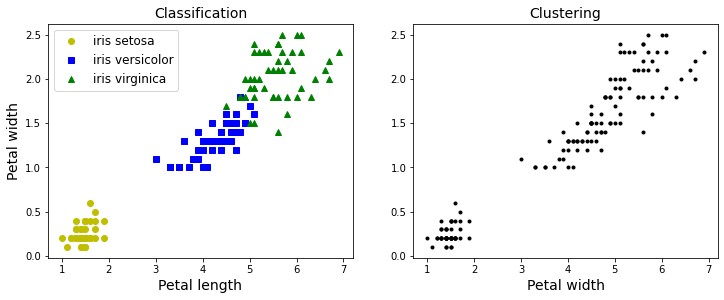

In [4]:
plt.figure(figsize=(12, 4.3))

plt.subplot(121)
#2,3번 특성만을 가지고 레이블마다 모양을 다르게 그리겠다..
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="iris virginica")
plt.title("Classification", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
#그냥 레이블 관계없이 그린다..
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.title("Clustering", fontsize=14)
plt.xlabel("Petal width", fontsize=14)
#plt.tick_params(labelleft=False)

plt.show()

**분석**

- 왼쪽은 분류.. 오른쪽은 군집..
- 오른쪽 그림에서 오른쪽위의 데이터는 두 종류의 데이터로 이루어졌는지 알기 어렵다..
- 지금은 특성 2개만 사용했는데, 나머지 특성도 쓰면 더 잘 구분할 것이다..
- ex)가우시안 혼합 모델을 사용하면 좋다..

###군집의 사용범위

- **고객 분류**
    - 추천 시스템
- **데이터 분석**
- **차원 축소 기법**
    - 군집을 하면 데이터들의 각 클러스터에 대한 샘플의 **친화성**을 측정..
    - 원래 $n$차원에서 클러스터의 갯수만큼의 차원으로 축소되는 효과을 얻음
- **이상치 탐지**
    - 부정거래 감지에 이용..
- **준지도 학습**
    - 레이블된 샘플이 적을때 사용..
    - 동일한 클러스터에 있는 모든 샘플에 레이블 전파 가능..
- 검색 엔진
- 이미지 분할

###군집 정리

- 보편적인 정의는 없다..
- 상황에 따라 다름!
- 알고리즘에 따라 다른 종류의 클러스터를 감지한다
    - 1) **센트로이드**를 중심으로 모인 샘플을 찾는다
    - 2) 샘플이 밀집되어 연속된 영역을 찾는다
    - 3) 계층적으로 클러스터의 클러스터를 찾는다..
    - 기타 등등..
- 이러한 알고리즘의 종류가 아주 많다..

##9.1.1 k-평균

###make_blobs 데이터 셋으로 확인..

####데이터 준비

In [5]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [7]:
#데이터 그리는 함수..

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

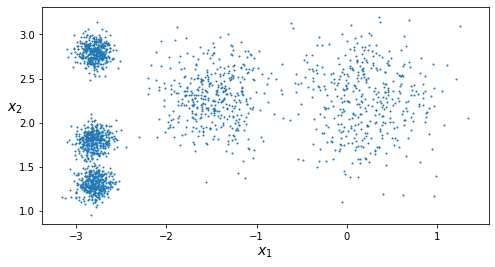

In [8]:
#샘플덩어리 다섯 개로 이루어진 레이블 없는 데이터 셋..

plt.figure(figsize=(8,4))
plot_clusters(X)

plt.show()

####훈련 및 예측

- KMeans 모델 사용
- 원래는 클러스터 갯수(k)도 모른다..
- 여기서는 5로 지정해서 함..

In [9]:
from sklearn.cluster import KMeans

#클러스터 5개로 지정
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
#훈련 및 예측
y_pred = kmeans.fit_predict(X)

In [10]:
#여기서 예측은 샘플이 속한 클러스터의 인덱스를 나타냄..

print(y_pred)
print(y_pred.shape)

[4 1 0 ... 3 0 1]
(2000,)


In [11]:
y_pred is kmeans.labels_

True

In [12]:
#센트로이드 5개 확인..
#책과 순서만 다름

kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

새로운 샘플의 레이블 예측도 가능!

In [13]:
#제일 가까운거 예측..
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

####결정 경계

In [14]:
#데이터 그리는 함수..
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

#센트로이드를 그리는 함수..
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None: #가중치 있을 때..
        centroids = centroids[weights > weights.max() / 10]
    
    #센트로이드 지점은 O위에 X로 점을 찍는다..
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

#결정경계를 그리는 함수..
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    #그림 그린다..
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    #데이터는 그냥 그린다..
    plot_data(X)

    #기타 선택사항.. 기본값은 모두 True
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

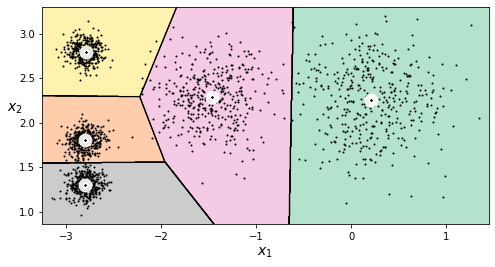

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

**분석**

- 보노로이 다이어그램임..
- 대부분 잘 분류되었다..
- 몇 개의 샘플은 잘못 분류되었다... (경계 부근의 샘플들)
- k-평균 알고리즘은 **클러스터의 크기가 많이 다르면 잘 작동하지 않는다.**
    - 거리 고려하는게 전부이기 때문!!

####하드 군집 _vs_ 소프트 군집

**하드 군집**

- 샘플을 클러스터마다 거리를 재서 제일 가까운 글러스터에 할당함..
- 유도리 없이 FM으로 그냥 하나당 하나 할당해버림

**소프트 군집**

- 하드 군집보다 유용할 수도...
- 클러스터마다 샘플에 점수를 부여하는 방식..
    - 5장의 유사도 점수와 비슷한 느낌..
    - KMeans 클래스에서는 각 클러스터까지의 거리를 점수로 생각..

실제 X_new의 예측이 [0, 0, 3, 3]이었고, transform()메서드를 사용한 결과도 각 샘플마다 위 인덱스의 값(센트로이드까지의 거리)이 가장 작은 것을 확인할 수 있다

또한 이런 방식은 효율적인 **비선형 차원 축소 기법**이 될 수 있다!!

In [16]:
#transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환..

kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

###k-평균 알고리즘

####학습 과정

- 초기 $k$개의 센트로이드 랜덤 초기화
- 각 샘플에 가장 가까운 센트로이드를 할당
- 같은 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트..
- 위 과정을 센트로이드에 변화가 없을 때까지 반복..
- 무한루프에는 절대 안 빠짐..

In [17]:
#교육적인 목적으로 사용하려면 init="random", n_init=1, algorithm="full"로
#매개변수 지정 필요

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

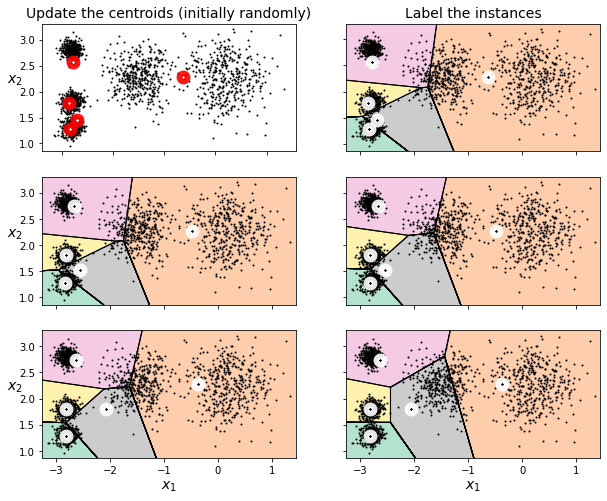

In [18]:
#각 모델별 결정경계 및 센트로이드 그래프..

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**분석**

- 왼쪽 위에서 센트로이드 랜덤 초기화..
- 오른쪽 위에서 그에 맞게 샘플에 레이블 할당..
- 왼쪽 중앙에서 센트로이드 업데이트..
- 오른쪽 중앙에서 레이블 재할당.
- 반복 시 점점 잘 군집되는 모양새..

####변동성..

- 수렴하는 건 보장되지만 적절성은 보장이 안 된다..
- 초기화에 따라서 다른 군집이 나올 수 있다..

In [19]:
#두 모델의 결정경계를 그리는 함수..
#훈련까지 해줌..
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

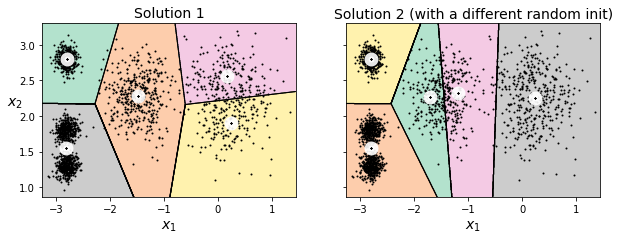

In [20]:
#random_state만 다른 군집기를 생성..
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

#비교 그래프 그림..
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

**분석**

- 초기화만 다르게 했는데 최적의 솔루션을 못 찾음..
- 초기화 개선의 필요성을 느낌..

###센트로이드 초기화 방법

**매개변수**

- n_init : 랜덤 초기화 횟수..
    - k-평균 알고리즘 자체가 이 횟수만큼 반복한다..
    - 이중에 최선의 솔루션 반환..
    - 평가지표 : **이너셔**
- init : 원하는 센트로이드 리스트를 넘파이 배열로 전달하면 초기화 가능..

In [21]:
#이렇게 하면 10번(n_init) 초기화해서 최저 이너셔 값을 갖는 모델 반환..

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             algorithm="full", random_state=2,
                             precompute_distances=True)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances=True, random_state=2,
       tol=0.0001, verbose=0)

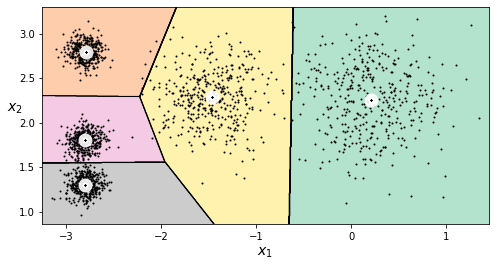

In [22]:
#결국 얘가 최적의 모델을 얻음!

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

####이너셔

각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [23]:
#위의 모델 두 개의 이너셔 확인..

print(kmeans_rnd_init1.inertia_)
print(kmeans_rnd_init2.inertia_)

219.8385799007183
236.94908363907354


In [24]:
#첫 모델(최고의 모델)의 이너셔..

print(kmeans.inertia_)

211.5985372581684


In [25]:
#score()값은 클수록 좋아야하므로 이너셔의 음숫값을 반환..

kmeans.score(X)

-211.59853725816856

####k-평균++ 알고리즘

- 똑똑한 초기화 단계를 제안..
- 이 방법이 KMeans의 init매개변수의 기본값임..
- 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤..
- 계산이 추가되지만, 알고리즘 반복 횟수를 크게 줄일 수 있어 가치가 있다..

**초기화 알고리즘**

- 무작위로 균등하게 하나의 센트로이드 $\mathbf{c}^{(1)}$을 선택한다
- $\dfrac{D(\mathbf{x}^{(i)})^2}{\sum\limits_{j=1}^{m}{D(\mathbf{x}^{(j)})}^2}$의 확률로 샘플 $\mathbf{x}^{(i)}$를 새로운 센트로이드 $\mathbf{c}^{(i)}$로 선택한다
    - 이 확률분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높인다
- $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복한다
- 여기서 $D(\mathbf{x}^{(i)})$는 샘플 $\mathbf{x}^{(i)}$에서 이미 선택된 가장 가까운 센트로이드까지 거리

###k-평균 속도 개선과 미니배치 k-평균

####속도 개선

- 삼각부등식을 사용
- 불필요한 거리 계산을 많이 피함 

####미니배치 k-평균

- 각 반복마다 미니배치를 사용해서 센트로이드를 조금씩 이동
- 속도를 3~4배 높임..
- 메모리에 데이터가 다 안드가면 memmap클래스 사용.. & partial_fit()

In [26]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [27]:
minibatch_kmeans.inertia_

211.93186531476775

**미니배치 _vs_ 일반 k-평균 알고리즘**

- 미니배치가 일반보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다..
    - 특히 클러스터 수가 증가할 때!!

timeit 메서드..

- 지정된 문장, setup 코드 및 timer 함수 : Timer 인스턴스를 만듦
- number : timeit() 메서드를 실행
- globals : 코드를 실행할 이름 공간을 지정

In [28]:
#빈 배열 두개 만들어서 훈련 시간 및 이너셔를 저장함..
#11분 소요..

from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

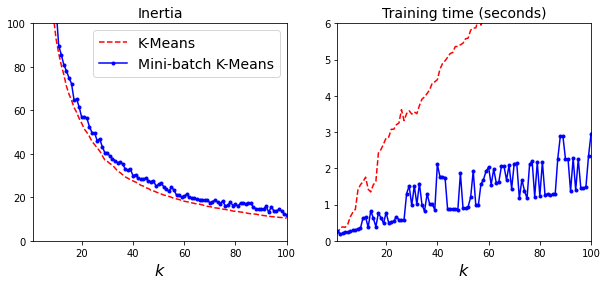

In [29]:
#클러스터 수에 따른 이너셔와 훈련시간 그래프..
plt.figure(figsize=(10,4))

plt.subplot(121)
#클러스터 수에 따른 이너셔 그래프..
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
#클러스터 수에 따른 훈련시간 그래프..
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

**분석**

- 미니배치가 시간은 훨씬 이득이다..
- 하지만 이너셔는 약간 손해를 본다..
    - 전체 이너셔가 줄어들기 때문에 두 모델의 차이가 차지하는 비율은 점점 커진다!

###최적의 클러스터 개수 찾기

- 원래는 $k$도 모른다!!
- 이것도 쉽지는 않다..

####클러스터 수를 다르게 한 결과..

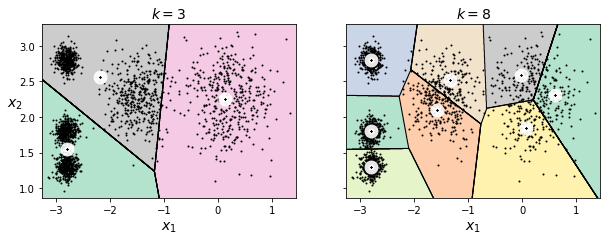

In [30]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

#훈련까지 해줌..
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

**분석**

- 좋지 않네..

In [31]:
#이너셔나 한번 보자..

print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

653.2167190021553
118.41983763508077


#####이너셔는 클러스터수가 증가하면 단순히 계속 작아진다..

In [32]:
#k를 1~9까지 돌리면서 KMeans모델을 훈련 후 이너셔 저장..

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

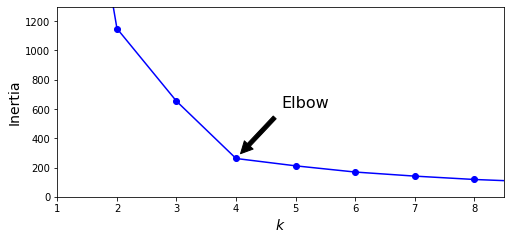

In [33]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

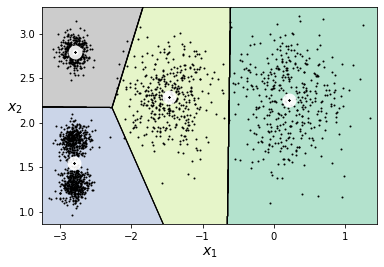

In [34]:
#엘보일 때의 모델을 그림..

plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

**분석**

- $k=4$에 엘보가 있다..
- $k=4$로 해도 좋긴하다..
- 근데 이렇게 엘보 만으로 확인하는 것은 엉성하다..

####실루엣 점수

- 최적의 클러스터 수를 선택하는 정확한 방법..

#####실루엣 점수

- 모든 샘플에 대한 **실루엣 계수**의 평균
- **실루엣 계수** = $\dfrac{(b-a)}{\text{max}(a, b)}$
- $a\text{는 동일한 클러스터에 있는 다른 샘플까지 평균 거리}$
- $b\text{는 가장 가까운 클러스터까지 평균 거리}$
- 실루엣 계수는 -1과 1사이의 값이다..
    - +1 에 가까우면 자신의 클러스터 안에 잘 속해 있다..
    - 0이면 클러스터 경계에 위치..
    - -1 에 가까우면 잘못된 클러스터에 있다..
- silhouette_score()메서드 사용..

In [35]:
from sklearn.metrics import silhouette_score

#샘플과 학습된 클러스터를 전달한다..
silhouette_score(X, kmeans.labels_)

0.655517642572828

**클러스터 수 변화에 따른 실루엣 점수 확인..**

In [36]:
#클러스터 수 : 2 ~ 8..
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

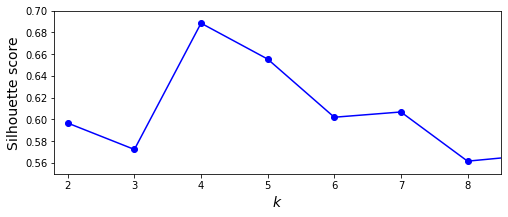

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

**분석**

- 앞선 이너셔만으로 확인한 그래프보다 많은 정보를 준다..
- $k=4$가 좋은 선택이지만 $k=5$도 좋은 선택이다.. 특히 $k=6, 7$보다는..

#####실루엣 다이아그램

- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬해서 그린 그래프..
- 그래프의 높이 : 클러스터가 포함하는 샘플의 갯수
- 그래프의 너비 : 클러스터에 포함된 샘플의 정렬된 실루엣 계수

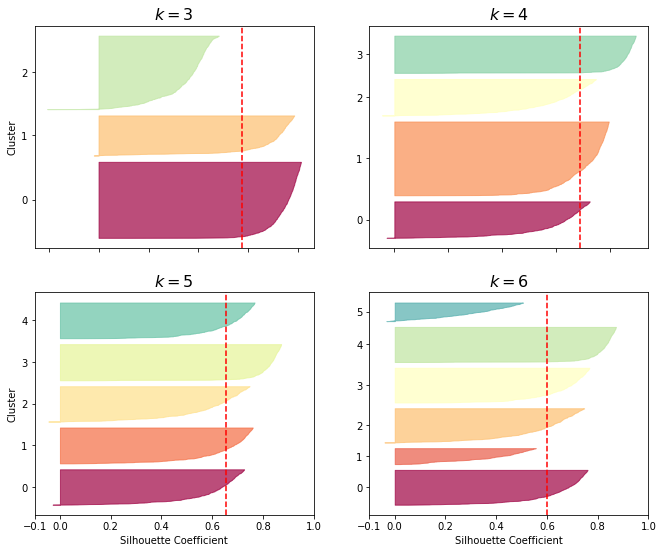

In [38]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_    #클러스터 갯수에 따른 예측..
    silhouette_coefficients = silhouette_samples(X, y_pred) #실루엣 계수..

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    #수직 파선을 그리기..
    #각 클러스터에 해당하는 실루엣 점수..
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

**분석**

- 더 많은 정보를 얻을 수 있다..
- 수직 파선 
    - 각 클러스터에 해당하는 실루엣 점수( 각 샘플의 실루엣 계수의 평균 )
    - 한 클러스터의 대부분이 실루엣 점수보다 낮으면 안 좋다.. (다른 클러스터랑 가깝다는 말임..)
- 위의 관점에서 보면 $k = 3, 6$은 2개의 클러스터가 수직파선을 넘지 못했다..
    - 안 좋다!!
- 또한 $k = 4, 5$인 경우는 상당히 좋다..
    - 하지만 전반적으로 점수가 높더라도 **비슷한 크기의 클러스터를 얻을 수 있는 $k = 5$가 제일 좋다..**

##9.1.2 k-평균의 한계

- 최적이 아닌 솔루션을 피하려면 알고리즘을 반복 실행해야 한다
- 클러스터의 갯수를 지정해야 한다
- **클러스터의 크기나 밀집도가 서로 다르**거나 **원형이 아닐 경우** 잘 작동하지 않는다

In [39]:
#데이터 생성..

#중심을 (4, -4), (0, 0)으로 하는 임의의 데이터를 1000개 뽑음..
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
#적절히 변환함..
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
#중심을 1로 하는 임의의 데이터를 250개 뽑음..
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
#적절한 변환..
X2 = X2 + [6, -8]

#배열을 옆으로 붙히기..
#결론은 총 1250개의 데이터를 사용하겠다..
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [40]:
X.shape, y.shape

((1250, 2), (1250,))

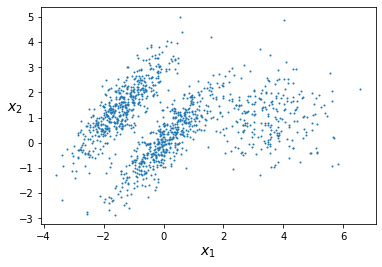

In [41]:
plot_clusters(X)

In [42]:
#두개의 KMeans 모델 생성 및 훈련..

kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

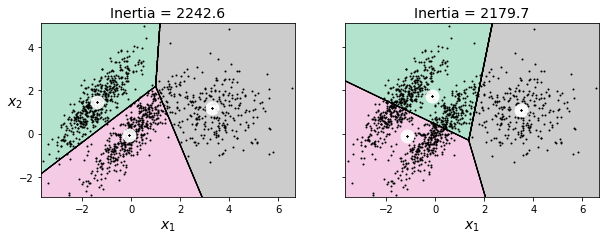

In [43]:
#plot_clusterer_comparision()메서드로도 출력 가능..

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

**분석**

- 왼쪽은 그나마 좋은데 중간 클러스터의 25%정도가 잘못 할당됨..
- 오른쪽은 이너셔는 낮지만 끔찍함..
- 이런 타원형 클러스터에는 **가우시안 혼합 모델**이 잘 작동한다..

##9.1.3 군집을 사용한 이미지 분할

**이미지 분할**

- 이미지를 세그먼트 여러 개로 분할하는 작업

**시맨틱 분할**

- 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨
- ex) 사람에 속한 픽셀이면 그냥 사람으로 같이 인식됨.. 손이든 발이든 간에..

**색상 분할**

- 위의 두 개보다는 훨 쉽다..
- 같은 색상을 갖는 픽셀을 세그먼트에 할당한다..

In [44]:
#ladybug 이미지 가져오기.. 마운트..

from matplotlib.image import imread
image = imread("/content/drive/MyDrive/Colab Notebooks/핸즈온머신러닝/new/ladybug.png")

In [45]:
#(높이, 너비, 컬러 채널 개수)

image.shape

(533, 800, 3)

In [46]:
#shape을 바꾸고 색상을 클러스터로 모은다..

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

#훈련 결과 해당하는 인덱스의 센터로이드로 저장..
#각 픽셀의 컬러 클러스터의 평균 컬러를 찾는다..
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#다시 출력을 위해 모양을 바꿈..
segmented_img = segmented_img.reshape(image.shape)

####클러스터 수(색상 갯수)에 따른 색상 분할 결과

In [47]:
#이미지 저장할 빈 배열
segmented_imgs = []
#색상 갯수 지정..
n_colors = (10, 8, 6, 4, 2)
#색상 갯수마다 위의 과정을 반복..
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

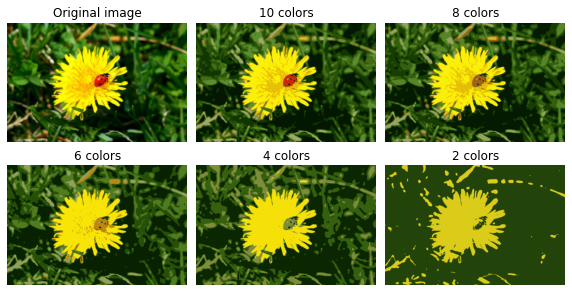

In [48]:
#그리자..

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

#원본은 그냥 그리고,
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

#색상 분할한 거는 따로 segmented_imgs리스트에서 가져와서 그린다..
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

**분석**

- K-평균은 비슷한 크기의 클러스터를 만드는 경향이 있다
- 무당벌레의 빨간색은 나머지 부분보다 훨씬 작아서 클러스터 수를 줄이면 하나의 클러스터로 남지 못한다..

##9.1.4 군집을 사용한 전처리

- 군집은 차원 축소에 효과적이다
- **클러스터 수가 축소되는 차원이 된다**

####원본 데이터로 분류 작업

In [49]:
#데이터 준비..

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [51]:
#로지스틱 회귀 모델 훈련..

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#정확도 평가.. 차원축소하지 않은 상태의 정확도..

log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

####임의의 k(50) 차원으로 축소 후 분류

차원 축소를 한다면??

- 군집으로 차원 축소 후 훈련하는 파이프라인 적용..
- 군집이 전처리에 사용됨,,
- 임의로 50개만 해보자..

In [53]:
#차원 축소(전처리) 후 훈련..
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=50, random_state=42)),
        ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [54]:
#점수 확인..

pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

**분석**

- 성능이 향상 되었다!!
- 임의로 50개의 클러스터를 지정한거니까 더 좋은 k도 찾을 수 있다!!

####그리드 서치로 최적의 k 탐색

- 최적의 k는 교차검증 점수가 가장 높도록 하는 값이다!!

In [55]:
#16분 소요..

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 16.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [56]:
#최적의 k는..??

grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [57]:
##최적의 점수는.??

grid_clf.score(X_test, y_test)

0.98

##9.1.5 군집을 사용한 준지도 학습

- 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

####임의로 레이블된 샘플을 훈련 및 예측..

- 점수가 좀 낮다..

In [58]:
#훈련..

n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#성능 평가..

log_reg.score(X_test, y_test)

0.8266666666666667

####대표 이미지를 사용하여 훈련 및 예측..

- 훈련 세트를 50개의 클러스터로 모은다
- 각 클러스터의 센트로이드에 가장 가까운 이미지를 찾는다..
- 그게 **대표 이미지**이다
- 대표이미지를 보고 수동으로 레이블을 할당한다..
- 대표이미지와 그에 대한 레이블로 훈련..
- 성능 평가한다..

In [60]:
#50개의 클러스터로 모음..
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)

#transform() 메서드가 센트로이드까지의 거리를 반환..
X_digits_dist = kmeans.fit_transform(X_train)

In [61]:
#아마 (X_train의 갯수, 50)..

print(X_train.shape)
print(X_digits_dist.shape)

(1347, 64)
(1347, 50)


axis=0 이므로 열을 따라서 최솟값의 인덱스를 찾아야한다..

In [62]:
#대표이미지 할당..

#각 클러스터(50개)마다 거리가 가장 짧은 샘플의 인덱스가 저장됨..
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [63]:
#대표이미지 50개 뽑음..
X_representative_digits.shape

(50, 64)

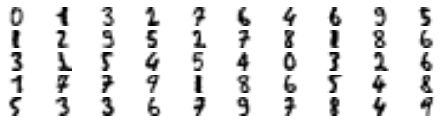

In [64]:
#대표이미지 확인..

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [65]:
#이미지를 보고 수동으로 할당..

y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [66]:
#대표이미지로 훈련 및 예측..

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#성능확인..
#훨씬 좋다!!

log_reg.score(X_test, y_test)

0.9266666666666666

####레이블 전파를 사용한 예측 및 훈련

- 레이블을 같은 클러스터에 있는 모든 다른 샘플에 전파..
- 이제 전체 데이터와 전파된 레이블로 훈련 및 예측..
- kmeans.labels_ : 샘플이 속한 클러스터의 인덱스를 저장..

In [68]:
#전체 레이블을 만들기 위한 빈 배열..
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

#각 클러스터마다 속하면 그 레이블을 할당한다..
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [69]:
#예시.. 2번째 클러스터에 속하는 샘플 수..

np.sum(kmeans.labels_ == 2)

19

In [70]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9111111111111111

클러스터에 속한 모든 샘플에 할당하면 경계부분의 잘못 속해져 있는 샘플에 대해서는 오전파된다..

센트로이드와 가까운 20%의 샘플에만 전파해보자..

In [71]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    #클러스터 안의 샘플 지정..
    in_cluster = (kmeans.labels_ == i)

    cluster_dist = X_cluster_dist[in_cluster] 

    #지정 거리를 percentile()메서드로 구한다..
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    
    #거리가 지정 거리보다 멀면 제거한다는 Bool값을 저장..
    above_cutoff = (X_cluster_dist > cutoff_distance)

    #클러스터 안에 있고 지정거리 보다 먼 샘플은 -1로 지정한다..(제외하려고)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [72]:
kmeans.labels_.shape

(1347,)

In [73]:
np.arange(len(X_train)), kmeans.labels_

(array([   0,    1,    2, ..., 1344, 1345, 1346]),
 array([13, 14, 26, ..., 39,  4, 10], dtype=int32))

In [74]:
X_cluster_dist.shape

(1347,)

In [75]:
#레이블 전파해야하는 샘플의 인덱스(-1이 아닌 것)를 저장
partially_propagated = (X_cluster_dist != -1)

#레이블 전파 및 훈련/타깃 재확립
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [76]:
#훈련 및 예측.. 좀 낫다..

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9266666666666666

실제로 일부만 전파한 레이블이 실제 레이블과 비슷하다!!

In [77]:
#거의 99%의 동일성..

np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896193771626297

##9.1.6 DBSCAN

- 이 알고리즘의 클러스터 : 밀집된 연속적 지역

**작동 방식**

- 각 샘플에서 작은 거리인 $\epsilon$내에 샘플이 몇 개 있는지 센다..(**$\epsilon$-이웃**)
- $\epsilon$-이웃 내에 적어도 min_samples개의 샘플이 있으면 그 샘플을 **핵심 샘플**로 간주..
- 핵심 샘플의 모든 샘플은 동일한 클러스터에 속한다..
- 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다..
- 핵심 샘플이 아니고 이웃도 아니면 이상치로 판단한다..

**DBSCAN 모델**

- 매개변수가 eps, min_samples 두 개 뿐임..
- labels_ : 클러스터의 인덱스..
- core_sample_indices_ : 핵심샘플의 인덱스
- components_ : 실제 핵심 샘플..

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan1 = DBSCAN(eps=0.05, min_samples=5)
dbscan1.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [79]:
#각 샘플의 클러스터 인덱스..
#-1은 아웃라이어..

print(dbscan1.labels_[:10])
print(dbscan1.labels_.shape)
print(np.unique(dbscan1.labels_))

[ 0  2 -1 -1  1  0  0  0  2  5]
(1000,)
[-1  0  1  2  3  4  5  6]


In [80]:
#핵심 샘플 수
print(len(dbscan1.core_sample_indices_))

#핵심 샘플의 인덱스..
print(dbscan1.core_sample_indices_[:10])

#핵심 샘플의 shape..
print(dbscan1.components_.shape)

808
[ 0  4  5  6  7  8 10 11 12 13]
(808, 2)


비교를 위한 새로운 모델.. eps=0.20으로 지정..

In [81]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [82]:
#모델의 클러스터링 결과를 그리는 함수..

#size는 동그라미의 크기를 지정..
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    #labels_모양으로 불리언 행렬을 만듦.. 전부 다 False..
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    #핵심샘플만 True로 바꿈..
    core_mask[dbscan.core_sample_indices_] = True

    #이상치를 알려주는 마스크 생성..(이상치이면 True..)
    anomalies_mask = dbscan.labels_ == -1

    #핵심이웃도 아니고, 이상치도 아닌 샘플을 알려주는 마스크..
    non_core_mask = ~(core_mask | anomalies_mask)

    #핵심, 이상치, 겉절이 샘플 저장..
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    #핵심은 동그라미, *표시..
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])

    #이상치는 x 표시..
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    #겉절이는 점으로..
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
    #아래는 그냥 옵션.. 기본값 다 True
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

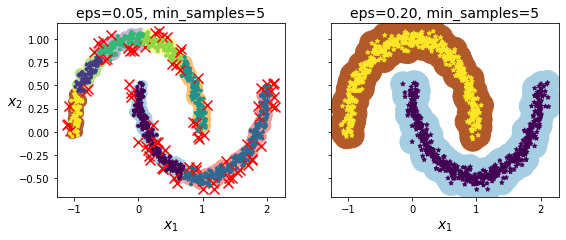

In [83]:
#이제 그리자..

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan1, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan, X, size=600, show_ylabels=False)

plt.show()

**분석**

- 왼쪽은 $\epsilon$이 작아 클러스터가 작고 종류가 많다
- 오른쪽처럼 $\epsilon$을 늘리면 샘플의 이웃 범위가 넓어지고 더 좋아진다..

DBSCAN 클래스는 predict()메서드가 없다!!

즉, 새로운 샘플에 대해 예측 시 사용자가 필요한 예측기를 선택 해야한다..

KNeighborsClassifier를 훈련해보자..

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
#핵심 샘플을 가지고 훈련..
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [85]:
#새로운 데이터 생성 및 예측..

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [86]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [87]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

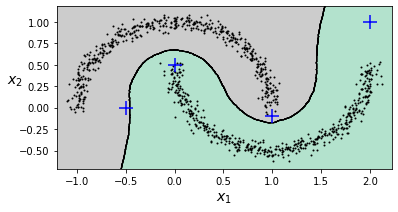

In [88]:
#결정경계를 그려보자..

plt.figure(figsize=(6,3))
plot_decision_boundaries(knn, X, show_centroids=False)

#새로운 데이터를 +모양..
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

위에서 훈련 시 핵심 샘플로만 훈련했기 때문에 가장 가까운 1개의 샘플만 봐도 된다..

In [89]:
#최근접 이웃 1개까지의 거리와 최근접 이웃 샘플의 인덱스..
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1

In [90]:
#shape이 1차원인데 인덱싱이 두개가 들어갈 수 있나..?

dbscan.labels_.shape

(1000,)

In [91]:
#얘는 또 2차원이네...?

y_pred.shape

(4, 1)

In [92]:
y_pred

array([[-1],
       [ 0],
       [ 1],
       [-1]])

In [93]:
y_pred.ravel()

array([-1,  0,  1, -1])

**시간 복잡도**

- 클러스터의 모양과 개수에 관계없이 감지할 수 있다..
- 이상치에 안정적이다..
- **클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능**하다..
- $O(m * logm)$.. 샘플 개수에 따라 선형적으로 증가..
- 메모리는 입실론이 커지면 $O(m^2)$만큼 더 필요함..

##9.1.7 다른 군집 알고리즘

###병합 군집

- 샘플 하나에서 시작해서 점점 병합해 간다..
- 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻는다..
- 대규모 샘플과 다양한 형태의 클러스터에 잘 확장됨..

###BIRCH

- 대규모 데이터셋 특화 알고리즘..
- 특성이 많지 않으면(20개 이하..) 배치 k-평균보다 빠르고 성능은 비슷하다..
- 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리구조를 만든다..
- 제한된 메모리를 사용해 대용량 데이터를 다룬다..

###평균-이동

- 모양이나 개수에 관계없이 클러스터를 찾을 수 있다..
- 국부적인 밀집도 추정에 의존함..
- 시간 복잡도 $O(m^2)$때문에 대규모에는 적합하지 않음..

**작동 방식**

- 각 샘플을 중심으로 하는 원을 그린다..
- 원마다 안에 포함된 모든 샘플의 평균을 구해서 원의 중심을 평균점으로 계속 이동시킨다
    - 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 이동..


###유사도 전파

- 샘플이 자신을 대표할 수 있는 비슷한 샘플에 투표..
- 크기가 다른 여러개의 클러스터를 감지할 수 있다..
- 시간 복잡도 $O(m^2)$때문에 대규모에는 적합하지 않음..

###스펙트럼 군집

- 샘플 사이의 유사도 행렬을 받아 저차원으로 축소한다..
- 그 저차원 공간에서 또 다른 군집 알고리즘 사용..
    - 사이킷런은 k-평균을 사용..
- 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는 데 사용할 수 있다..

#9.2 가우시안 혼합

- K개의 가우시안 분포가 혼합된 형태이다!!
- K가 미리 정해져 있어야 한다!

In [94]:
#데이터 준비..

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [95]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

**기댓값-최대화(EM)** 알고리즘

- 가중치, 평균, 분산을 추정하는 알고리즘..

**작동 과정**

- 클러스터 파라미터를 랜덤초기화 후 수렴할 때까지 다음 두 단계를 반복..
- 1) **기댓값 단계**
    - 샘플을 클러스터에 할당
    - 현재 클러스터 파라미터에 기반하여 각 클러스터에 속할 확률 예측..
- 2) **최대화 단계**
    - 클러스터를 업데이트..
        - **책임**이 가장 많은 샘플에 크게 영향을 받음
    - 각 클러스터가 데이터셋의 모든 샘플을 사용해 업데이트..
    - **책임** : 클러스터에 속할 추정 확률..

**비교**

- k-평균의 일반화라고 생각할 수 있다..
- 클러스터 중심 (평균 : $\mu^{(1)}$에서 $\mu^{(k)}$까지)뿐만 아니라 **크기, 모양, 방향**(공분산 : $\sum^{(1)}$에서 $\sum^{(k)}$까지)
과 **클러스터의 상대적 가중치**($\phi^{(1)}$에서 $\phi^{(k)}$)까지 찾는다..

In [98]:
print('weights')
print(gm.weights_)
print('means')
print(gm.means_)
print('covariances')
print(gm.covariances_)

weights
[0.40008431 0.20970929 0.3902064 ]
means
[[-1.4076241   1.42704927]
 [ 3.39854326  1.05926051]
 [ 0.0512132   0.07512971]]
covariances
[[[ 0.63480459  0.72971575]
  [ 0.72971575  1.16110086]]

 [[ 1.14901133 -0.03241901]
  [-0.03241901  0.95484861]]

 [[ 0.68780591  0.79597839]
  [ 0.79597839  1.21232694]]]


In [99]:
#수렴여부, 반복횟수
print(gm.converged_)
print(gm.n_iter_)

True
4


In [100]:
#하드군집..

gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [101]:
#소프트군집.. (각 클러스터일 확률 계산)

gm.predict_proba(X)

array([[6.80230786e-07, 2.33107018e-02, 9.76688618e-01],
       [6.77302883e-04, 1.65481663e-02, 9.82774531e-01],
       [9.99923748e-01, 2.04358925e-06, 7.42085667e-05],
       ...,
       [2.17682412e-26, 9.99999578e-01, 4.21582331e-07],
       [1.50345348e-41, 1.00000000e+00, 4.93027253e-16],
       [8.24833927e-41, 1.00000000e+00, 2.19825399e-15]])

가우시안 혼합 모델을 **생성 모델**

- 모델에서 새로운 샘플을 만들 수 있다..

In [102]:
#생성 모델.. 새로운 데이터 생성 가능

X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-1.05776458  2.00129262]
 [-2.36832334  0.19218423]
 [ 1.25143619  4.78631491]
 [ 3.63006478  0.33750027]
 [-1.54615896 -2.01255033]
 [ 0.0985044   0.56263317]]
[0 0 0 1 2 2]


주어진 위치에서 모델의 밀도를 추정하는 score_samples()메서드..
    
- **확률 밀도 함수**의 로그값을 예측함..
- 점수가 높을수록 밀도가 높다

In [103]:
gm.score_samples(X)

array([-2.60753797, -3.57117632, -3.32962239, ..., -3.51337454,
       -4.39800533, -3.80760349])

In [104]:
#가우시안 혼합모델의 결정경계 그리기

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

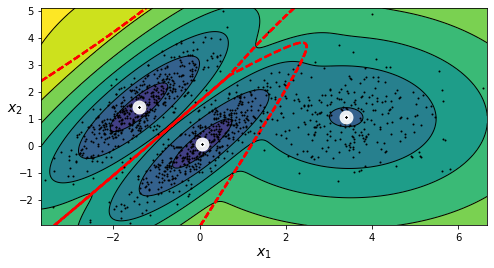

In [105]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

**공분산 제약**

특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다

알고리즘이 학습할 파라미터의 개수를 제한해야 한다

- 클러스터의 모양과 방향의 범위를 제한
- 즉, 공분산 행렬에 제약을 추가한다..
- 매개변수 covariance_type을 조정..
    - "spherical", "diag", "tied", "full"

In [106]:
#공분산 매개변수 달리해서 모델 만들기..

gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [109]:
#4개를 한꺼번에 그리는 함수..

def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(9, 9))

    plt.subplot(221)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(222)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

    plt.subplot(223)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)

    plt.subplot(224)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm4.covariance_type), fontsize=14)

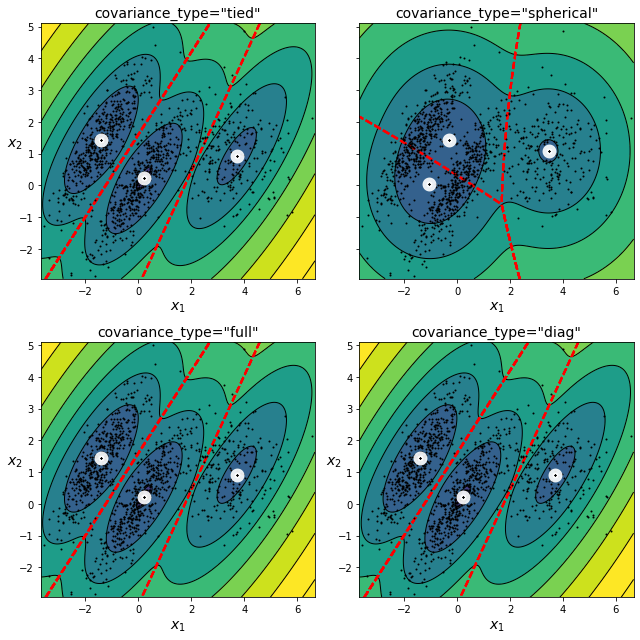

In [110]:
compare_gaussian_mixtures(gm_tied, gm_spherical, gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

##9.2.1 가우시안 혼합을 사용한 이상치 탐지

**이상치** : 보통과 많이 다른 샘플..

**정상치** : 보통 샘플..


**이상치 탐지**

- 보통과는 많이 다른 샘플을 감지하는 작업
- 모델 훈련 전에 많이 함..
- **밀도가 낮은 지역에 있는 샘플을 이상치로 간주..**
    - 그럼 **밀도 임계값**이 필요,,

In [111]:
#확률 밀도함수의 로그값 반환
densities = gm.score_samples(X)

#4%를 밀도 임계값으로 지정
density_threshold = np.percentile(densities, 4)

#이상치 지정..
anomalies = X[densities < density_threshold]

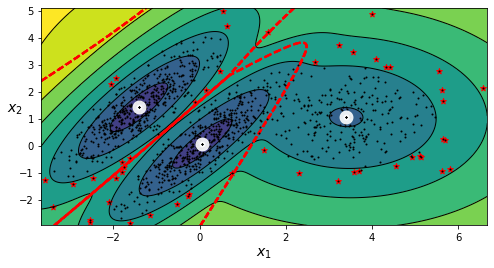

In [112]:
#그래프..

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
#이상치 찍기
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

##9.2.2 클러스터 개수 선택하기

- K를 어떻게 찾느냐..??
- **이론적 정보 기준** (**BIC, AIC**)를 최소화 하는 모델을 찾는다..
    - BIC : Bayesian information criterion
    - AIC : Akaike information criterion

$
BIC = log(m)p - 2log(\hat{L}) \\
AIC = 2p - 2log(\hat{L})
$

\\
여기에서,

- $m$은 샘플의 갯수
- $p$는 모델이 학습할 파라미터 갯수
- $\hat{L}$은 모델의 **가능도 함수**(likelihood function)의 최댓값

**모델 선택 과정**

- 둘 다 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터를 잘 학습하는 모델에게 보상을 준다..
- 종종 동일한 모델을 선택한다..
- 선택이 다를 시에는 BIC가 좀 더 간단한 경향이 있다..
    - 하지만 데이터에 잘 맞지 않을 수 있다..

In [113]:
gm.bic(X)

8189.756836104972

In [114]:
gm.aic(X)

8102.531555989934

**여러 k값에 대한 BIC, AIC 측정**

- 둘다 젤 작은 k=3이 최선의 선택같아 보인다..

In [115]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
            for k in range(1, 11)]

In [116]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

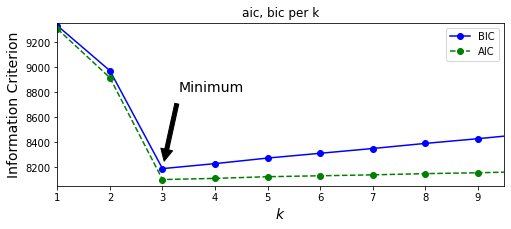

In [118]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title("aic, bic per k")
plt.legend()
plt.show()

##9.2.3 베이즈 가우시안 혼합 모델

- 최적의 클러스터 개수를 수동으로 찾지않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스..
- 매개변수 n_components를 최적의 클러스터보다 큰 값으로 지정해야한다..

In [119]:
#알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지함..

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.39, 0.03, 0.  , 0.4 , 0.18, 0.  , 0.  , 0.  , 0.  , 0.  ])

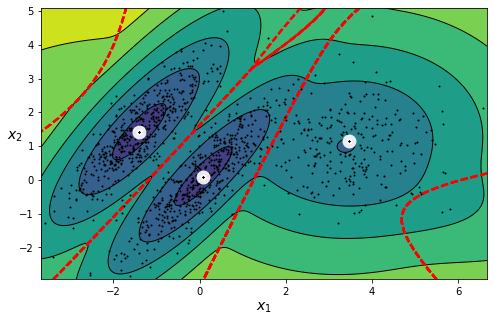

In [120]:
#거의 앞의 일반 가우시안 혼합 모델과 흡사하다

plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm, X)
plt.show()

####사전 믿음

- weight_concentration_prior 매개변수로 조정가능..
    - 높으면 클러스터가 많을 것이라고 예측
    - 낮으면 클러스터가 적을 것이라고 예측..

In [121]:
#낮은 사전 믿음..
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
#높은 사전 믿음..
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)

#적은 데이터로 학습해서 극적인 차이를 원함..
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [122]:
#적은 클러스터수.. 많은 0

np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [123]:
#많은 클러스터수.. 적은 0

np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

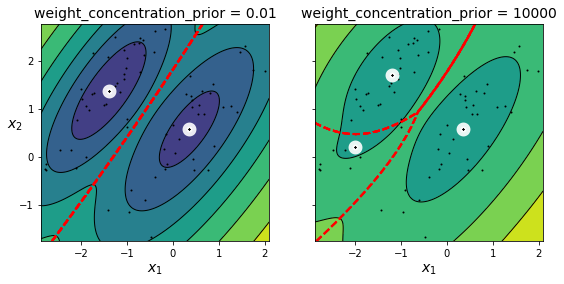

In [124]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

####가우시안 혼합 모델은 타원에 잘 작동한다

In [125]:
#반달 데이터 셋..

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [126]:
#훈련..

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

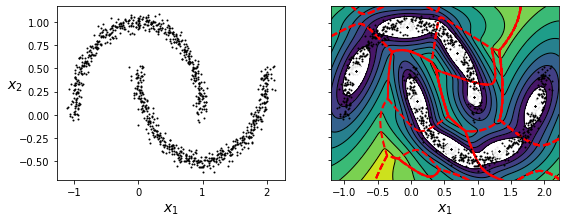

In [127]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

**분석**

- 필사적으로 타원을 찾으려는 모습..
- 좋지 않다!!

##9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

**PCA**

**Fast-MCD**

**아이솔레이션 포레스트**

**LOF**

**one-class SVM**

#9.3 연습문제